# Data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer, LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, skiprows=22, header=None, sep="\\s+")
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                 'B', 'LSTAT']

In [4]:
boston = pd.DataFrame(data=data, columns=feature_names)
boston['target'] = target

In [5]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
observation = len(boston)
variables = boston.columns[:-1]
X = boston.iloc[:, :-1]
y = boston['target'].values

Для проверки логистической регрессии

In [7]:
yq = np.array(y>25, dtype=int)

In [8]:
yq

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,

### Центрирование среднего

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f'coeff:{lin_reg.coef_}, \n\n intercept: {lin_reg.intercept_}')

coeff:[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01], 

 intercept: 36.45948838509014


Тоже самое, только с центрированными данными. Коэффициенты остались теме же

In [10]:
centering = StandardScaler(with_mean=True, with_std=False)
lin_reg.fit(centering.fit_transform(X), y)
print(f'coeff:{lin_reg.coef_}, \n\n intercept: {lin_reg.intercept_}')

coeff:[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01], 

 intercept: 22.532806324110677


In [11]:
y.mean()

22.532806324110677

### Стандартизация

Единичная дисперсия

In [12]:
standardization = StandardScaler(with_mean=True, with_std=True)
lin_reg.fit(standardization.fit_transform(X), y)
print(f'coeff:{lin_reg.coef_}, \n\n intercept: {lin_reg.intercept_}')

coeff:[-0.92814606  1.08156863  0.1409      0.68173972 -2.05671827  2.67423017
  0.01946607 -3.10404426  2.66221764 -2.07678168 -2.06060666  0.84926842
 -3.74362713], 

 intercept: 22.532806324110677


### Нормализация

In [13]:
scaling = MinMaxScaler(feature_range=(0, 1))
lin_reg.fit(scaling.fit_transform(X), y)
print(f'coeff:{lin_reg.coef_}, \n\n intercept: {lin_reg.intercept_}')

coeff:[ -9.60975755   4.64204584   0.56083933   2.68673382  -8.63457306
  19.88368651   0.06721501 -16.22666104   7.03913802  -6.46332721
  -8.95582398   3.69282735 -19.01724361], 

 intercept: 26.620267584687788


### Logistic regression

In [14]:
Xq = sm.add_constant(standardization.fit_transform(X))
logit = sm.Logit(yq, Xq)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.206631
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  506
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                           13
Date:                Tue, 03 Jan 2023   Pseudo R-squ.:                  0.6289
Time:                        14:43:17   Log-Likelihood:                -104.56
converged:                       True   LL-Null:                       -281.76
Covariance Type:            nonrobust   LLR p-value:                 9.145e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0542      0.356     -8.571      0.000      -3.753      -2.356
x1            -0.0954      0.

In [15]:
print(f'коэффициенты: {np.exp(result.params)}')

коэффициенты: [ 0.04715936  0.909015    1.28963975  0.46907677  1.27787825  0.45278266
  3.76007165  1.10314365  0.28965347 15.90341401  0.16157711  0.46602966
  0.81345263  0.07275098]


In [16]:
def sigmoid(p):
    return 1 / (1 + np.exp(-p))

print(f'intercept: {result.params[0]}')
print(f'вероятность цены дома выше 25, если все переменные имеют среднее значение: {sigmoid(result.params[0])}')

intercept: -3.0542227609143815
вероятность цены дома выше 25, если все переменные имеют среднее значение: 0.04503551455585123


Средняя вероятность по выборке

In [17]:
sum(yq) / float(len(yq))

0.2450592885375494

Нулевая модель

In [18]:
C = np.ones(len(X))
logit = sm.Logit(yq, C)
result = logit.fit()
print(result.summary())
print(f'вероятность цены дома выше 25: {sigmoid(result.params[0])}')

Optimization terminated successfully.
         Current function value: 0.556842
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  506
Model:                          Logit   Df Residuals:                      505
Method:                           MLE   Df Model:                            0
Date:                Tue, 03 Jan 2023   Pseudo R-squ.:               3.276e-11
Time:                        14:43:18   Log-Likelihood:                -281.76
converged:                       True   LL-Null:                       -281.76
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1251      0.103    -10.886      0.000      -1.328      -0.923
вероятность цены дома выше 25

## Качественные признаки

Линейный регрессор может анализировать качественные данные только после правильного преобразования в числовые значения

In [19]:
outlook = ['sunny', 'overcast', 'rainy']
temperature = ['hot', 'mild', 'cool']
humidity = ['hight', 'normal']
windy = ['TRUE', 'FALSE']

In [20]:
weather_dataset = []

In [21]:
for o in outlook:
    for t in temperature:
        for h in humidity:
            for w in windy:
                weather_dataset.append([o, t, h, w])

In [22]:
weather_dataset

[['sunny', 'hot', 'hight', 'TRUE'],
 ['sunny', 'hot', 'hight', 'FALSE'],
 ['sunny', 'hot', 'normal', 'TRUE'],
 ['sunny', 'hot', 'normal', 'FALSE'],
 ['sunny', 'mild', 'hight', 'TRUE'],
 ['sunny', 'mild', 'hight', 'FALSE'],
 ['sunny', 'mild', 'normal', 'TRUE'],
 ['sunny', 'mild', 'normal', 'FALSE'],
 ['sunny', 'cool', 'hight', 'TRUE'],
 ['sunny', 'cool', 'hight', 'FALSE'],
 ['sunny', 'cool', 'normal', 'TRUE'],
 ['sunny', 'cool', 'normal', 'FALSE'],
 ['overcast', 'hot', 'hight', 'TRUE'],
 ['overcast', 'hot', 'hight', 'FALSE'],
 ['overcast', 'hot', 'normal', 'TRUE'],
 ['overcast', 'hot', 'normal', 'FALSE'],
 ['overcast', 'mild', 'hight', 'TRUE'],
 ['overcast', 'mild', 'hight', 'FALSE'],
 ['overcast', 'mild', 'normal', 'TRUE'],
 ['overcast', 'mild', 'normal', 'FALSE'],
 ['overcast', 'cool', 'hight', 'TRUE'],
 ['overcast', 'cool', 'hight', 'FALSE'],
 ['overcast', 'cool', 'normal', 'TRUE'],
 ['overcast', 'cool', 'normal', 'FALSE'],
 ['rainy', 'hot', 'hight', 'TRUE'],
 ['rainy', 'hot', 'hight

In [23]:
play = [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]

### Преобразование через get_dummies

In [24]:
df = pd.DataFrame(weather_dataset, columns=['outlook', 'temperature', 'humidity', 'windy'])
print(pd.get_dummies(df.humidity).iloc[:5, :])

   hight  normal
0      1       0
1      1       0
2      0       1
3      0       1
4      1       0


In [25]:
dummy_encoding = pd.get_dummies(df)

Теперь можно и проанализировать данные

In [26]:
X = sm.add_constant(dummy_encoding)
logit = sm.Logit(play, X)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.292346
         Iterations 23
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Tue, 03 Jan 2023   Pseudo R-squ.:                  0.5744
Time:                        14:43:18   Log-Likelihood:                -10.524
converged:                       True   LL-Null:                       -24.731
Covariance Type:            nonrobust   LLR p-value:                 7.856e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2393   5.36e+07   4.46e-09      1.000   -1.05e+08    1.05e+08
outlook_ov

### Преобразование через DictVectorizer

In [27]:
vectorizer = DictVectorizer(sparse=False)
dict_representation = [{
    varname:var for var, varname in zip(row, ['outlook', 'temperature', 'humidity', 'windy'])
} for row in weather_dataset]

print(dict_representation[0])
print(vectorizer.fit_transform(dict_representation))

{'outlook': 'sunny', 'temperature': 'hot', 'humidity': 'hight', 'windy': 'TRUE'}
[[1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1.

In [28]:
print(vectorizer.feature_names_)

['humidity=hight', 'humidity=normal', 'outlook=overcast', 'outlook=rainy', 'outlook=sunny', 'temperature=cool', 'temperature=hot', 'temperature=mild', 'windy=FALSE', 'windy=TRUE']


### Преобразование через LabelEncoder, LabelBinarizer

In [29]:
label_encoder = LabelEncoder()
print(label_encoder.fit_transform(df.outlook))

[2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


обратное преобразование

In [30]:
print(label_encoder.inverse_transform([0, 1, 2]))

# or

print(label_encoder.classes_)

['overcast' 'rainy' 'sunny']
['overcast' 'rainy' 'sunny']


In [31]:
label_binarizer = LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

print(label_binarizer.fit_transform(df.outlook))

[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


### Преобразование числовых признаков

In [32]:
X = data
y = target

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(r2_score(y, lin_reg.predict(X)))

0.7406426641094094


* Остатки

Всегда имеют нулевое среднее значение

In [33]:
residuals = y - lin_reg.predict(X)

print(f'Residual: {residuals[:5]}')
print(f'Mean of residual: {residuals.mean():.3f}')
print(f'STD of residual: {residuals.std():.3f}')

Residual: [-6.00384338 -3.42556238  4.13240328  4.79296351  8.25647577]
Mean of residual: -0.000
STD of residual: 4.679


* График частичных остатков

Форма графика отличается от вытянутого облака точек, это явный признак нелинейности

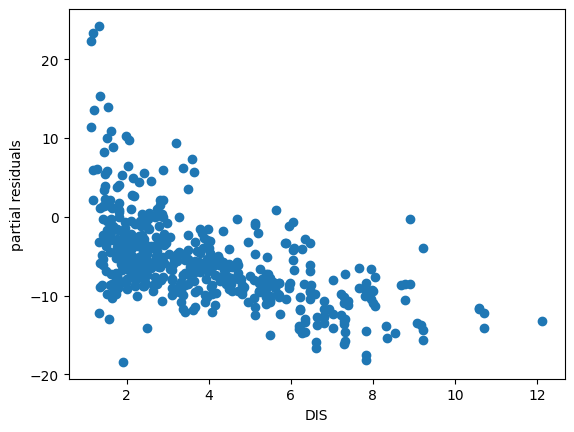

In [34]:
var = 7
partial_residual = residuals + X[:, var] * lin_reg.coef_[var]

plt.plot(X[:, var], partial_residual, 'o')
plt.xlabel(feature_names[var])
plt.ylabel('partial residuals')
plt.show()

Обратное квадратичное преобразование сделало график более прямым. Это указывает на повышенную способность модели фиксировать распределенные данные.

Функции исправления ниленейности:
1. np.log(x)
2. np.exp(x)
3. x**2
4. x**3
5. np.sqrt(x)
6. x**(1./3.)
7. 1./x

Для нуля: np.log(x+1)

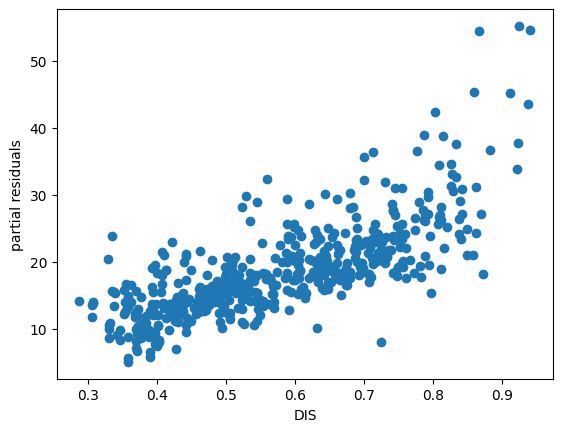

R2 = 0.769


In [36]:
X_t = X.copy()
X_t[:, var] = 1./np.sqrt(X_t[:, var])
lin_reg.fit(X_t, y)
partial_residual = residuals + X_t[:, var] * lin_reg.coef_[var]
plt.plot(X_t[:, var], partial_residual, 'o')
plt.xlabel(feature_names[var])
plt.ylabel('partial residuals')
plt.show()

print(f'R2 = {r2_score(y, lin_reg.predict(X_t)):.3f}')